In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import numpy as np

num_samples_test = 50

(x_train, y_train), (x_test, y_test) =  mnist.load_data()

x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1, ))

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

activation_mode = "relu"

2023-09-13 17:27:41.906519: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 17:27:41.934782: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 17:27:41.935655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 17:27:42.733213: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = tf.keras.Sequential([
    layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation=activation_mode,
        input_shape=(28, 28, 1)
    ),
    layers.Conv2D(10, 3, activation=activation_mode),
    layers.MaxPool2D(),
    layers.Conv2D(10, 3, activation=activation_mode),
    layers.Conv2D(10, 3, activation=activation_mode),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

model.summary()

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train,
    epochs=25
)

2023-09-11 18:37:02.316532: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-11 18:37:05.721779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-11 18:37:05.723266: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 18:37:10.121422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 10)          0         
 g2D)                                                   

2023-09-11 18:37:16.199945: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 24s 12ms/step - loss: 0.2231 - accuracy: 0.9276
Epoch 2/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0809 - accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0626 - accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0523 - accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0455 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0404 - accuracy: 0.9871
Epoch 7/10
1173/1875 [=================>............] - ETA: 8s - loss: 0.0357 - accuracy: 0.9886

KeyboardInterrupt: 

In [5]:
from keras.models import load_model
model = load_model('digit-recognizer.h5')

In [6]:
model.evaluate(x_test, y_test)

predictions = model.predict(x_test[:num_samples_test])

model.save("digit-recognizer.h5")

2/2 [==============================] - 0s 4ms/step


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


/tmp/ipykernel_6781/4048106834.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


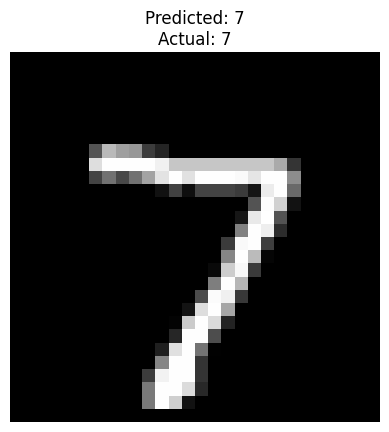

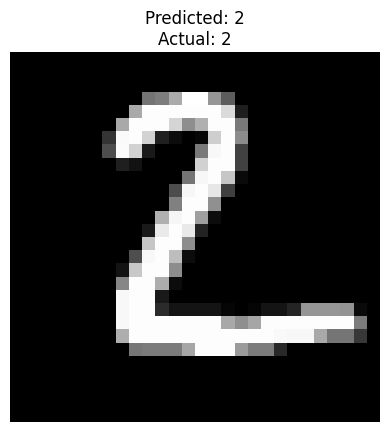

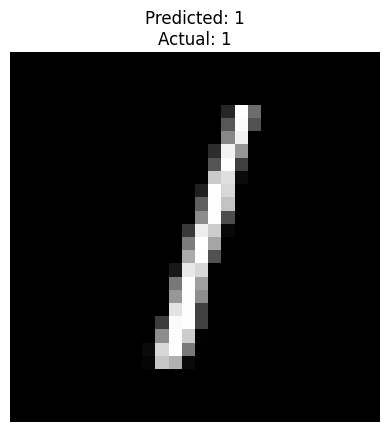

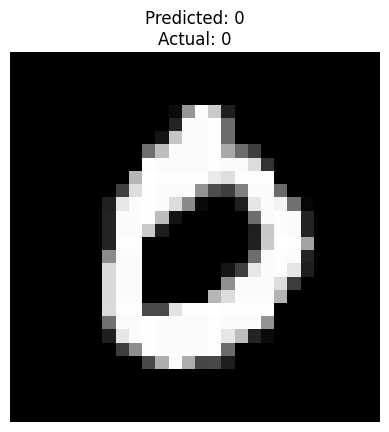

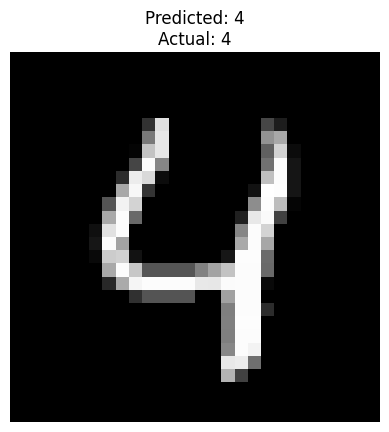

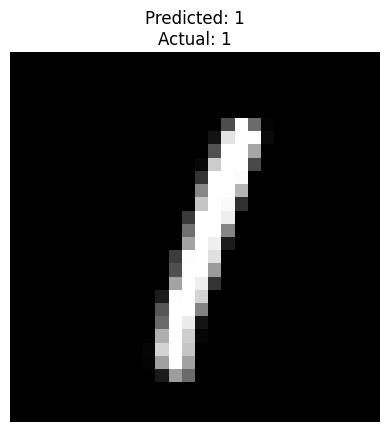

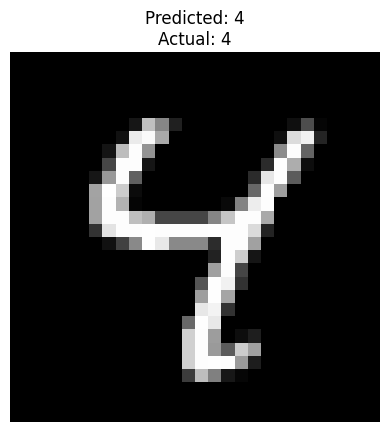

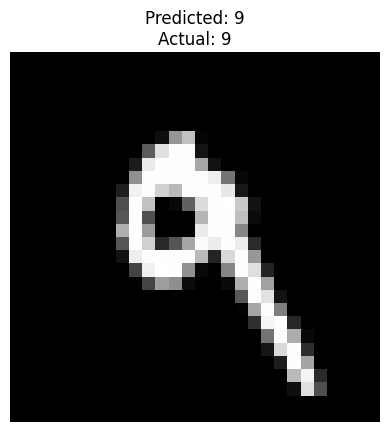

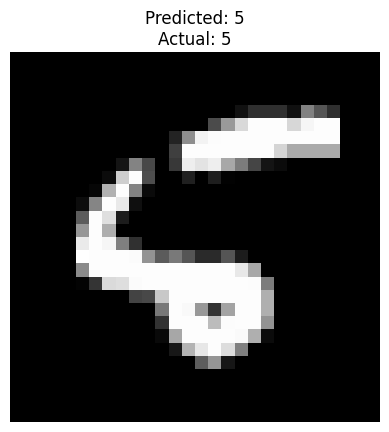

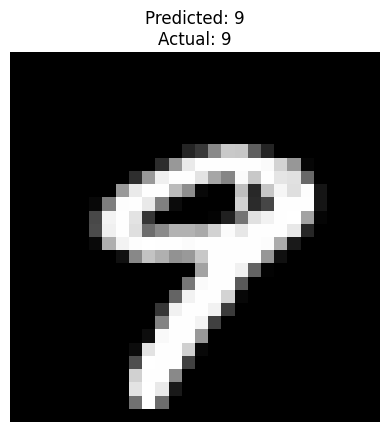

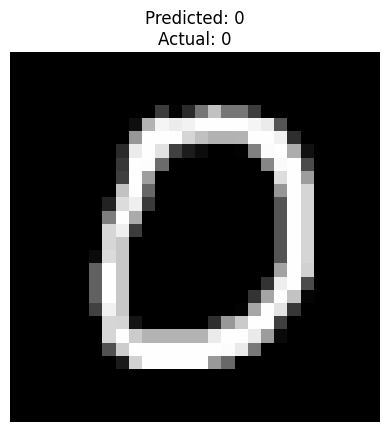

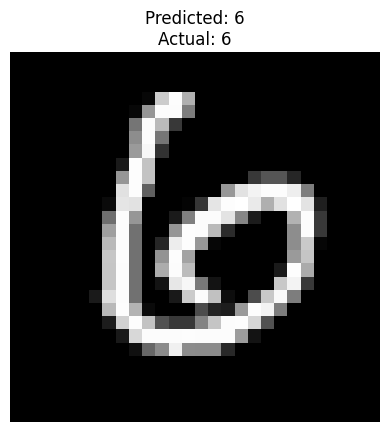

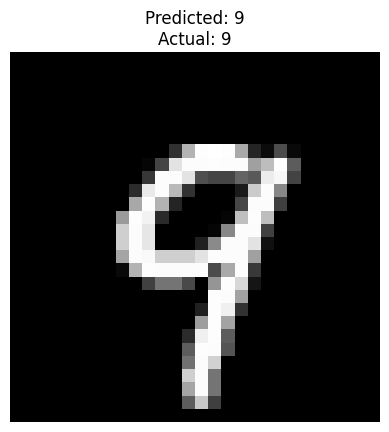

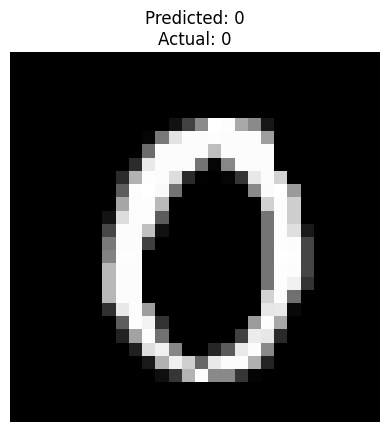

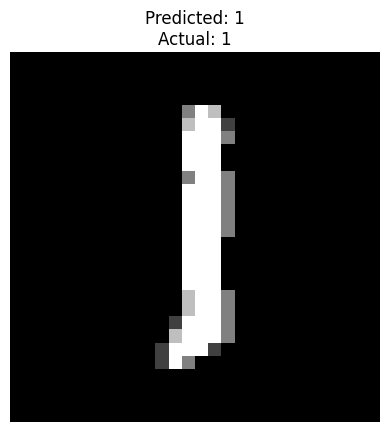

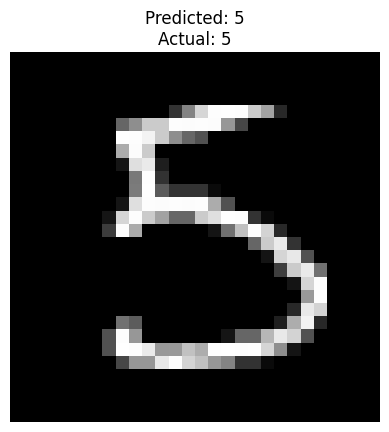

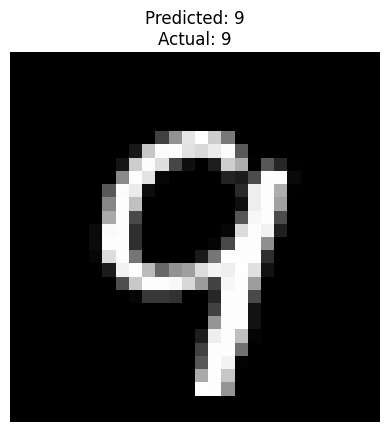

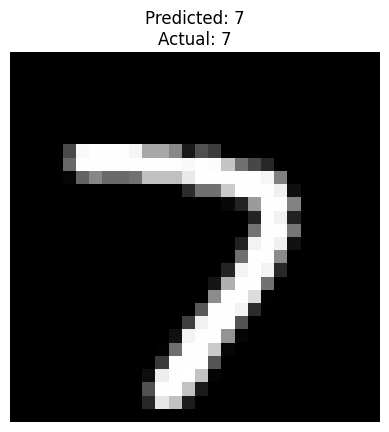

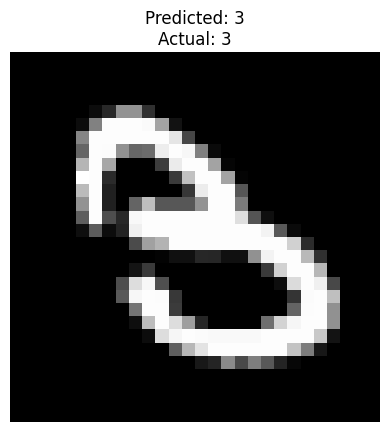

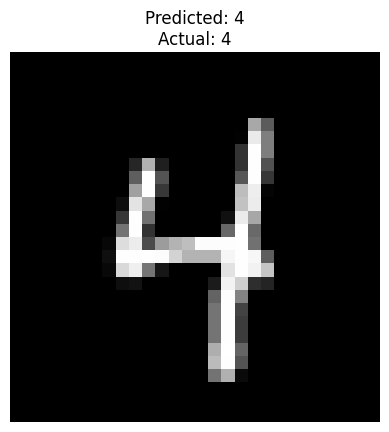

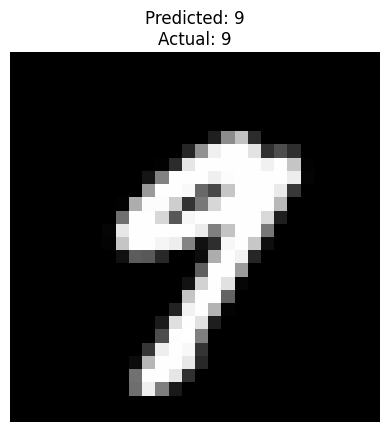

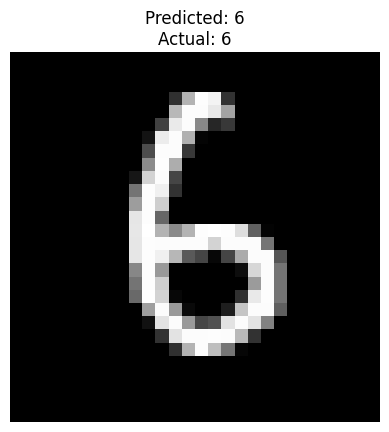

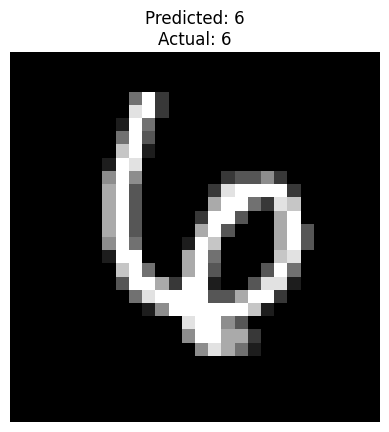

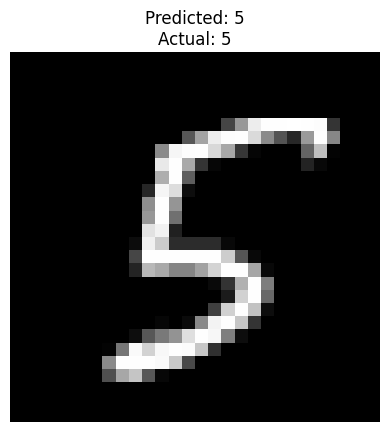

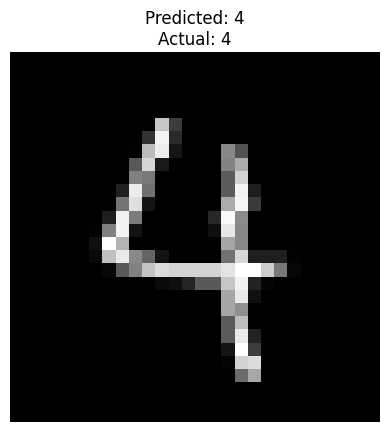

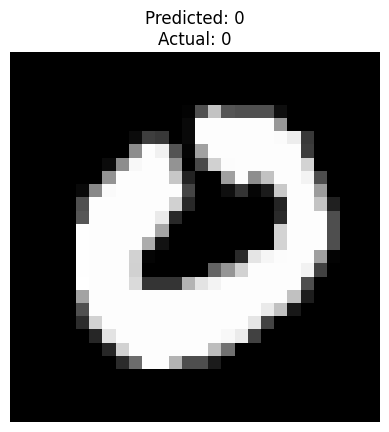

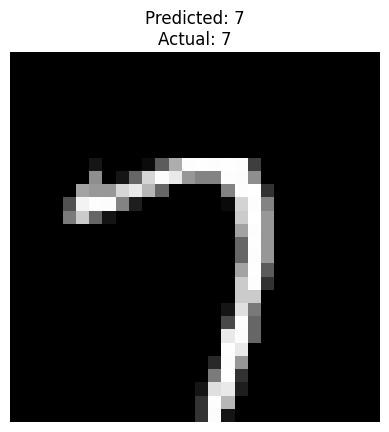

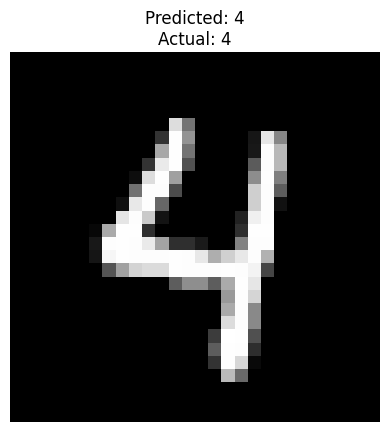

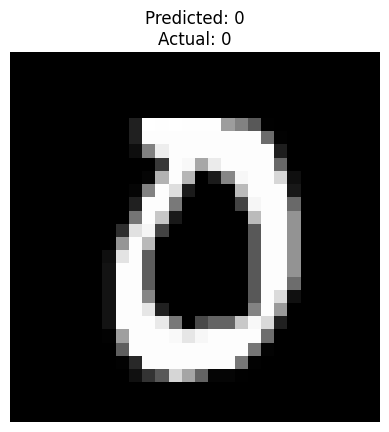

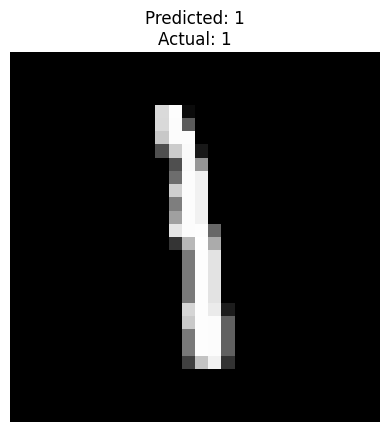

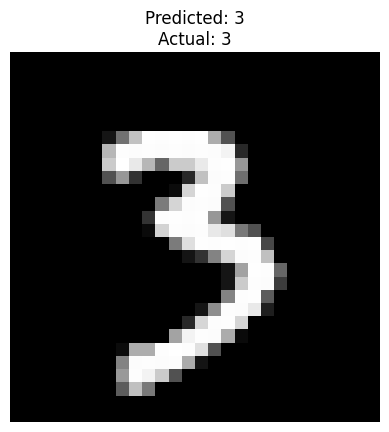

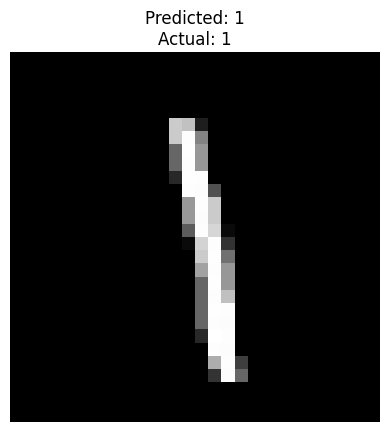

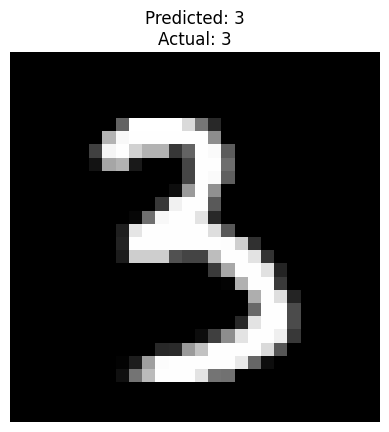

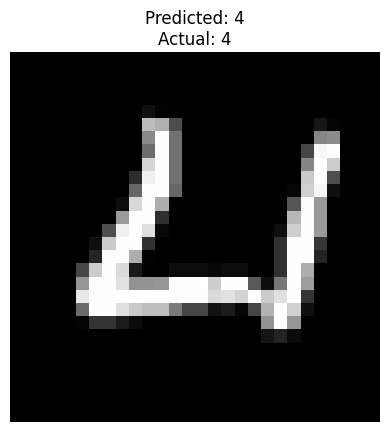

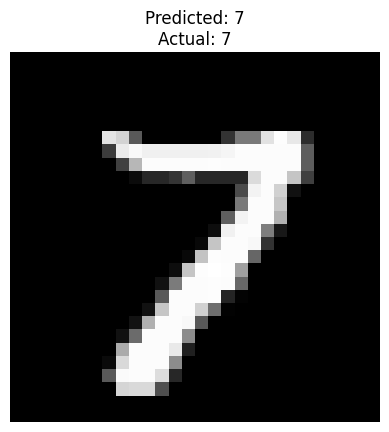

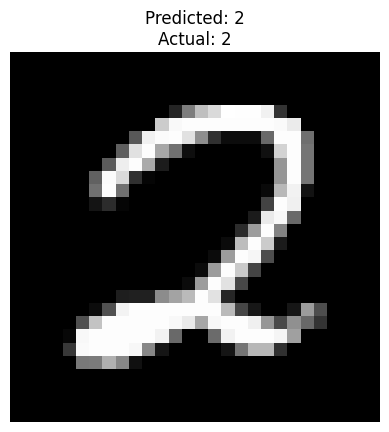

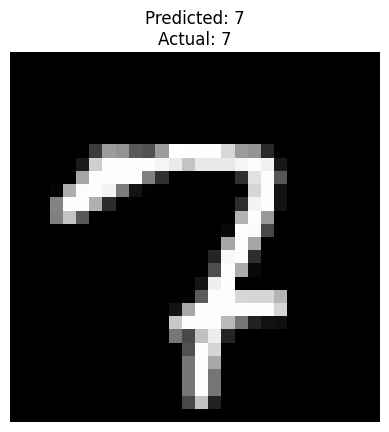

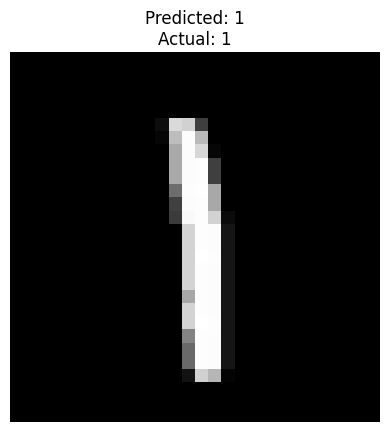

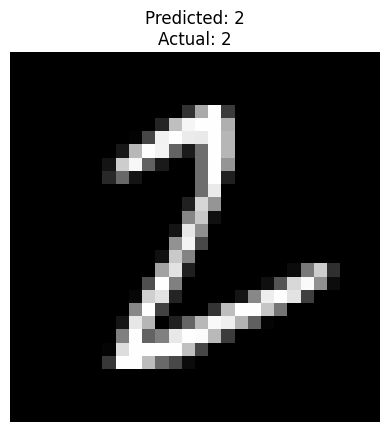

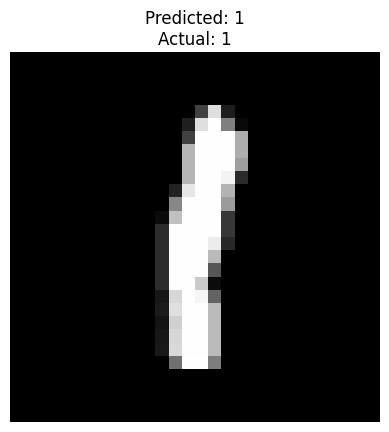

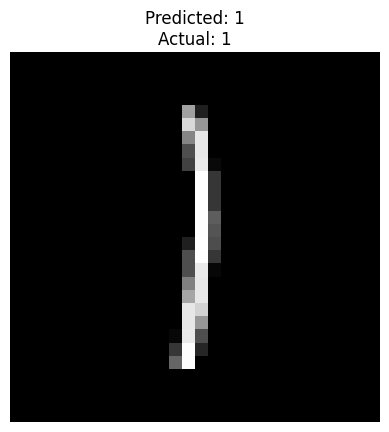

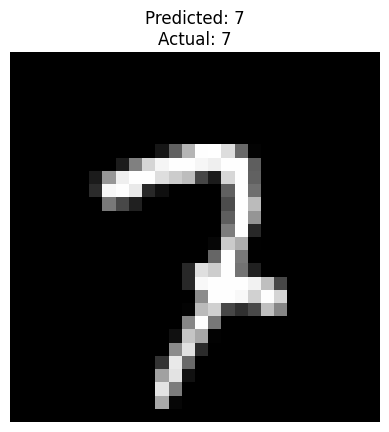

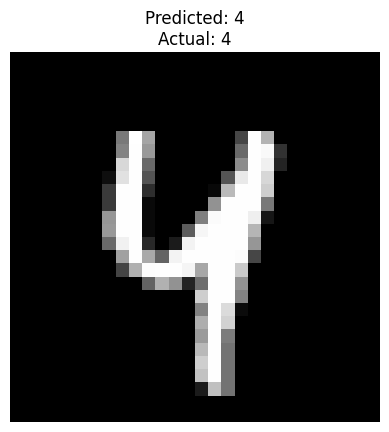

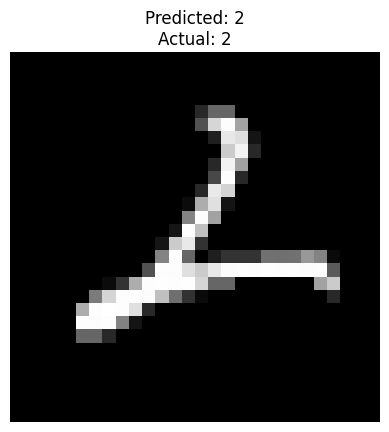

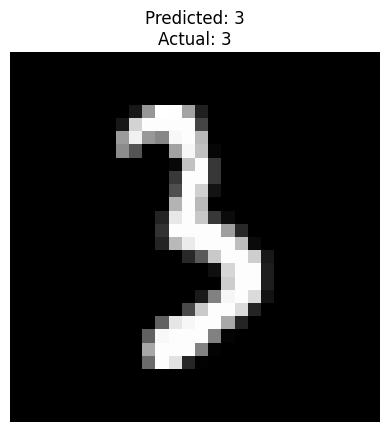

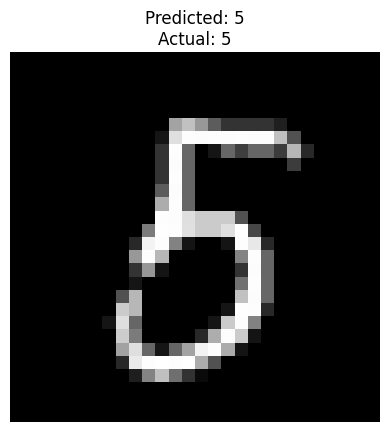

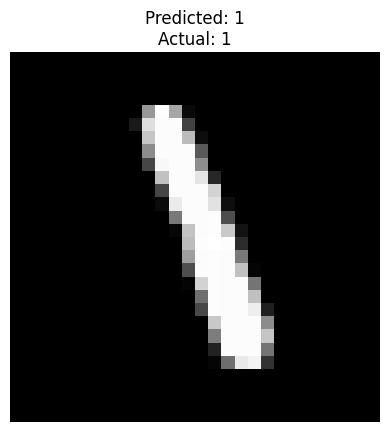

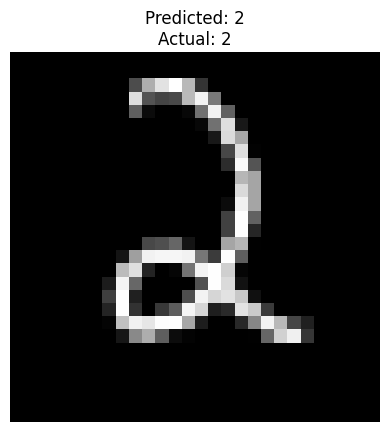

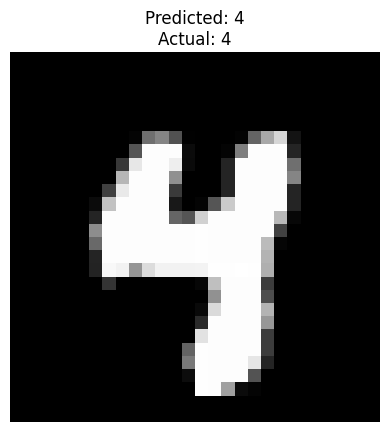

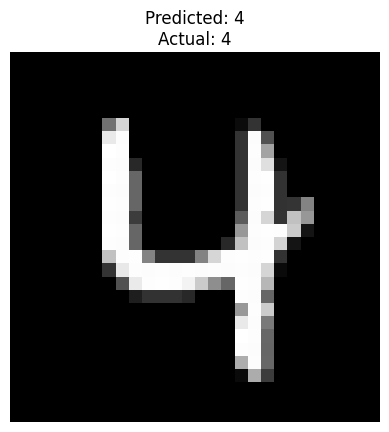

In [14]:
import matplotlib.pyplot as plt

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

num_samples_to_visualize = 50

for i in range(num_samples_to_visualize):
    plt.figure()
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}\nActual: {y_test[i]}")
    plt.axis('off')